On importe les librairies dont on aura besoin pour ce tp

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Valeur limite des Nan acceptée
# Il faut donc moins de _VALEUR_LIMITE_NAN valeurs "NaN" pour garder la colonne
_VALEUR_LIMITE_NAN = 200000

# Référence en y du plot
_ORDONNEE = "nutrition-score-fr_100g"

# Lieu où se trouve le FICHIER
_FICHIER = 'C:\\Users\\Toni\\Desktop\\pas_synchro\\bdd.csv'

Fonction qui permet de selectionner des colonnes pour la base de données

In [3]:
def remplir_colonnes(data, nom_colonne, colonnes):

    # Log
    print("\nFct remplir_colonnes : Traitement de : %s" % nom_colonne)

    # test du type de la colonne. IL n'y a que les valeurs numériques qui
    # nous intéressent
    if data[nom_colonne].dtype == 'float':
        # si "100g" est trouvé dans le nom de la colonne
        if nom_colonne.find('100g') != -1 and nom_colonne.find('uk') == -1:
            colonnes.append(nom_colonne)
            print("Cette donnée est gardée")
        else:
            print("Cette donnée est exclue : pas de 100g")

    else:
        print("Cette donnée est exclue : pas un float")

 Fonction qui permet de supprimer des colonnes de la bdd

In [4]:
def supprimer_colonnes(data, nom_colonne):

    # Log
    print("\nFct supprimer_colonnes : Traitement de : %s" % nom_colonne)

    # nombre de valeurs "NaN"
    # .isnull().sum() = nombre par ligne
    # .isnull().sum().sum() = nombre total
    cpt_nan = data[nom_colonne].isnull().sum().sum()

    # S'il y a plus de valeur "Nan" que le chiffre défini, on vire la colonne
    if cpt_nan > (_VALEUR_LIMITE_NAN):
        # Suprresion de la colonne
        del data[nom_colonne]

        # Log
        print("Cette donnée est exclue : elle contient %.0f 'NaN' " % cpt_nan)
    else:
        # Log
        print("Cette donnée est gardée : elle contient %.0f 'NaN' " % cpt_nan)

Statistiques sur les données manquantes

In [5]:
def fct_missing_data(data):

    # Compte les données manquantes par colonne
    missing_data = data.isnull().sum(axis=0).reset_index()

    # Change les noms des colonnes
    missing_data.columns = ['column_name', 'missing_count']

    # Crée une nouvelle colonne et fais le calcul en pourcentage des données manquantes
    missing_data['fill_fact'] = (data.shape[0]-missing_data['missing_count']) / data.shape[0] * 100

    # Classe
    print(missing_data.sort_values('fill_fact', ascending=False).reset_index(drop=True))

    # Affichage de la valeur moyenne de données vides
    print("% fill_fact : ", missing_data['fill_fact'].mean())

Fonction qui permet d'afficher les nuages de points

In [6]:
def affichage_plot(data, nom_colonne):

    #Log
    print("Fct affichage_plot : Affichage de la courbe\n")

    # Déliminations du visuel pour x
    xmax = max(data[nom_colonne])
    ymax = max(data[_ORDONNEE])

    # Déliminations du visuel pour y
    xmin = min(data[nom_colonne])
    ymin = min(data[_ORDONNEE])

    # création du nuage de point avec toujours la même ordonnée
    data.plot(kind="scatter", x=nom_colonne, y=_ORDONNEE)

    # Affichage
    plt.grid(True)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

A partir de ce point, nous sommes dans le main.

In [7]:
# Définition de la variable qui récupère le nom des colonnes
colonnes = []

# On charge la première ligne du dataset
bdd_titres = pd.read_csv(_FICHIER,
                         nrows=1,
                         error_bad_lines=False,
                         engine='python',
                         sep=r'\t')

In [8]:
# Fonction qui va choisir les colonnes à récupérer suivant les crières définis
for i in bdd_titres:
    remplir_colonnes(bdd_titres, i, colonnes)


Fct remplir_colonnes : Traitement de : "code
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : url
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : creator
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : created_t
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : created_datetime
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : last_modified_t
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : last_modified_datetime
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : product_name
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : generic_name
Cette donnée est exclue : pas de 100g

Fct remplir_colonnes : Traitement de : quantity
Cette donnée est exclue : pas un float

Fct remplir_colonnes : Traitement de : packaging
Cette donnée est exclue : pas de 100g

Fct

In [9]:
# On charge le dataset sur les colonnes qui nous ont intéressés dans la fonction du dessus
data = pd.read_csv(_FICHIER,
                   usecols=colonnes,
                   error_bad_lines=False,
                   engine='python',
                   sep=r'\t')

In [10]:
# Appel de le fonction qui va montrer les données manquantes
fct_missing_data(data)

                         column_name  missing_count  fill_fact
0                        energy_100g          59701  81.389440
1                      proteins_100g          60888  81.019418
2                          salt_100g          65289  79.647496
3                        sodium_100g          65347  79.629416
4                        sugars_100g          75838  76.359062
5                           fat_100g          76919  76.022083
6                 carbohydrates_100g          77226  75.926382
7                 saturated-fat_100g          91255  71.553130
8            nutrition-score-fr_100g          99600  68.951747
9                         fiber_100g         119915  62.618964
10                  cholesterol_100g         176701  44.917096
11                    trans-fat_100g         177493  44.670206
12                      calcium_100g         179742  43.969126
13                    vitamin-c_100g         179925  43.912080
14                         iron_100g         180329  43

Seules 11% de données sont disponibles. Nous allons maintenant essayer d'arranger cela.

In [11]:
# On supprime les lignes qui sont vides et n'ont que des "nan"
data = data.dropna(axis=1, how='all')
data = data.dropna(how='all')

In [12]:
# Suppression des colonnes qui ne remplissent pas les conditions posées
for i in data:
    supprimer_colonnes(data, i)


Fct supprimer_colonnes : Traitement de : energy_100g
Cette donnée est gardée : elle contient 4351 'NaN' 

Fct supprimer_colonnes : Traitement de : energy-from-fat_100g
Cette donnée est exclue : elle contient 264584 'NaN' 

Fct supprimer_colonnes : Traitement de : fat_100g
Cette donnée est gardée : elle contient 21569 'NaN' 

Fct supprimer_colonnes : Traitement de : saturated-fat_100g
Cette donnée est gardée : elle contient 35905 'NaN' 

Fct supprimer_colonnes : Traitement de : caproic-acid_100g
Cette donnée est exclue : elle contient 265435 'NaN' 

Fct supprimer_colonnes : Traitement de : caprylic-acid_100g
Cette donnée est exclue : elle contient 265429 'NaN' 

Fct supprimer_colonnes : Traitement de : capric-acid_100g
Cette donnée est exclue : elle contient 265439 'NaN' 

Fct supprimer_colonnes : Traitement de : lauric-acid_100g
Cette donnée est exclue : elle contient 265437 'NaN' 

Fct supprimer_colonnes : Traitement de : myristic-acid_100g
Cette donnée est exclue : elle contient 265

Cette donnée est exclue : elle contient 264273 'NaN' 

Fct supprimer_colonnes : Traitement de : chromium_100g
Cette donnée est exclue : elle contient 265421 'NaN' 

Fct supprimer_colonnes : Traitement de : molybdenum_100g
Cette donnée est exclue : elle contient 265430 'NaN' 

Fct supprimer_colonnes : Traitement de : iodine_100g
Cette donnée est exclue : elle contient 265182 'NaN' 

Fct supprimer_colonnes : Traitement de : caffeine_100g
Cette donnée est exclue : elle contient 265363 'NaN' 

Fct supprimer_colonnes : Traitement de : taurine_100g
Cette donnée est exclue : elle contient 265412 'NaN' 

Fct supprimer_colonnes : Traitement de : ph_100g
Cette donnée est exclue : elle contient 265392 'NaN' 

Fct supprimer_colonnes : Traitement de : fruits-vegetables-nuts_100g
Cette donnée est exclue : elle contient 262414 'NaN' 

Fct supprimer_colonnes : Traitement de : collagen-meat-protein-ratio_100g
Cette donnée est exclue : elle contient 265276 'NaN' 

Fct supprimer_colonnes : Traitement de 

On va afficher les points avant le traitement

Avant traitement
Fct affichage_plot : Affichage de la courbe



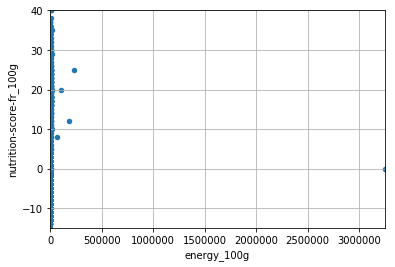

Avant traitement
Fct affichage_plot : Affichage de la courbe



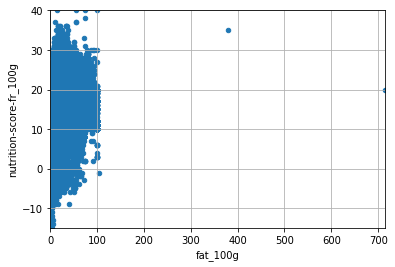

Avant traitement
Fct affichage_plot : Affichage de la courbe



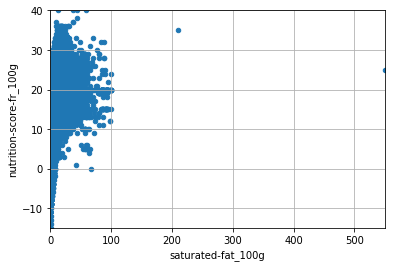

Avant traitement
Fct affichage_plot : Affichage de la courbe



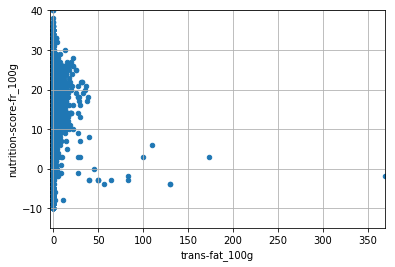

Avant traitement
Fct affichage_plot : Affichage de la courbe



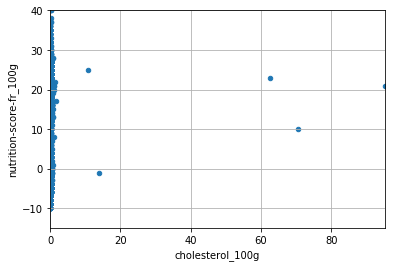

Avant traitement
Fct affichage_plot : Affichage de la courbe



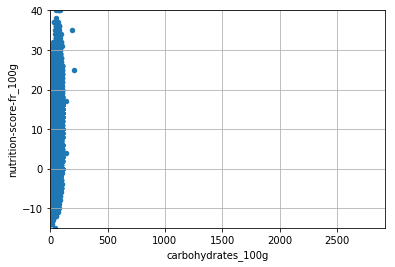

Avant traitement
Fct affichage_plot : Affichage de la courbe



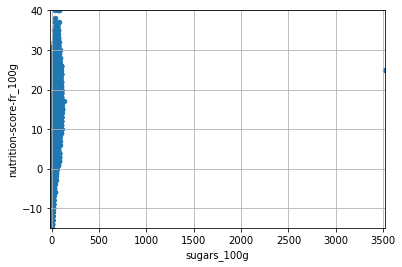

Avant traitement
Fct affichage_plot : Affichage de la courbe



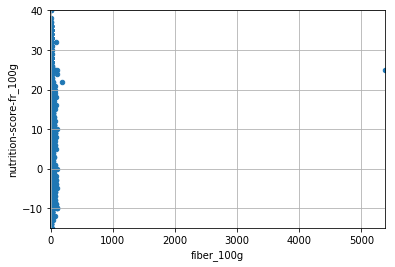

Avant traitement
Fct affichage_plot : Affichage de la courbe



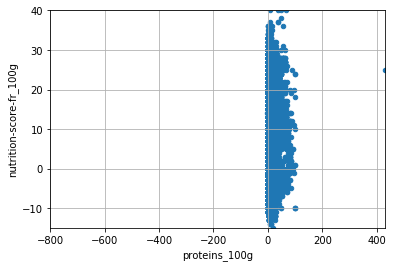

Avant traitement
Fct affichage_plot : Affichage de la courbe



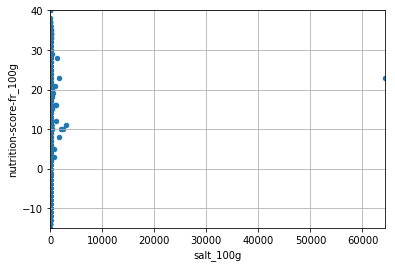

Avant traitement
Fct affichage_plot : Affichage de la courbe



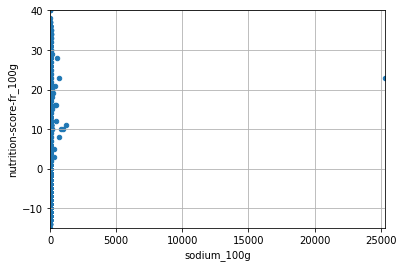

Avant traitement
Fct affichage_plot : Affichage de la courbe



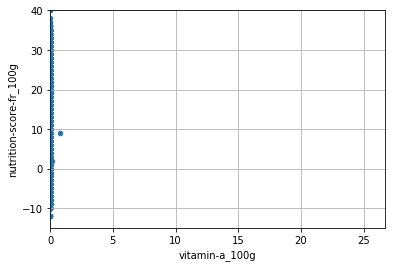

Avant traitement
Fct affichage_plot : Affichage de la courbe



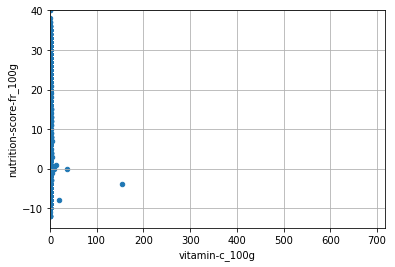

Avant traitement
Fct affichage_plot : Affichage de la courbe



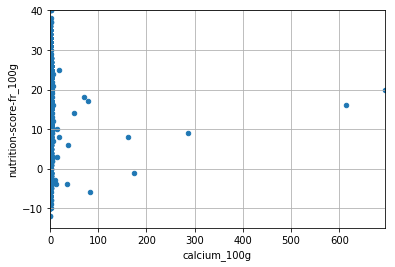

Avant traitement
Fct affichage_plot : Affichage de la courbe



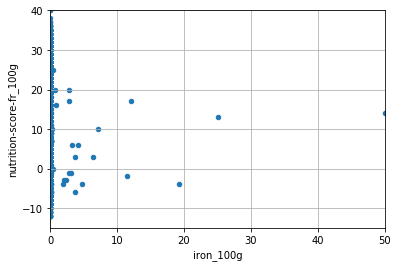

In [13]:
# Trouver le numéro de colonne qui nous sert d'ordonné dans l'affichage
position_ordonne = data.columns.get_loc(_ORDONNEE)

# Affichage des nuages de points avant traitement
for i in data.columns.values[0:position_ordonne]:
    # Log
    print("Avant traitement")
    affichage_plot(data, i)

In [ ]:
# Log
print("Fct traitement_data : \n")

for nom_colonne in data.columns.values[0:position_ordonne]:
    # On garde les valeurs positives
    data = data[data[nom_colonne] >= 0]
    # On prends 98% de toutes les valeurs pour couper les grandes valeurs farfelues
    data = data[data[nom_colonne] <= data[nom_colonne].quantile(0.98)]

On va maintenant afficher les points après le traitement

Fct traitement_data : 

Après traitement
Fct affichage_plot : Affichage de la courbe



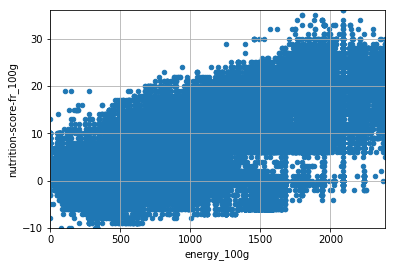

Après traitement
Fct affichage_plot : Affichage de la courbe



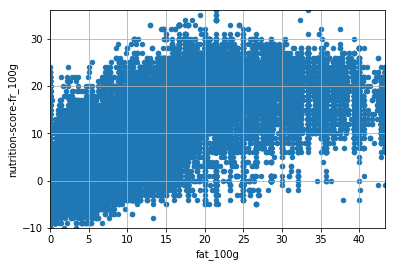

Après traitement
Fct affichage_plot : Affichage de la courbe



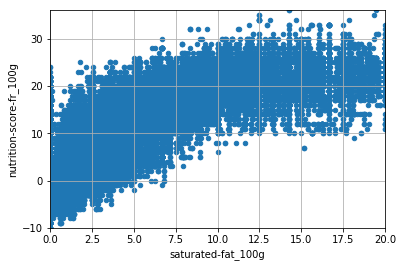

Après traitement
Fct affichage_plot : Affichage de la courbe



C:\Users\Toni\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


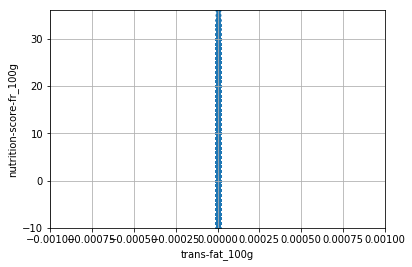

Après traitement
Fct affichage_plot : Affichage de la courbe



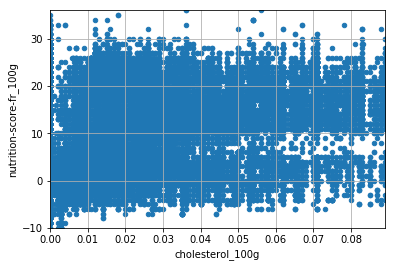

Après traitement
Fct affichage_plot : Affichage de la courbe



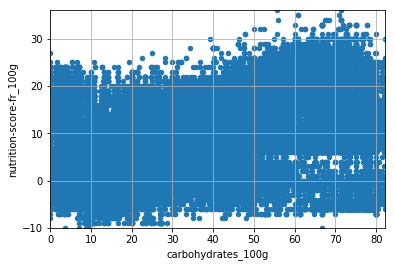

Après traitement
Fct affichage_plot : Affichage de la courbe



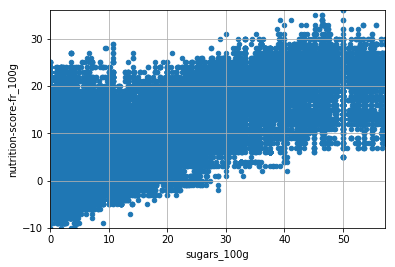

Après traitement
Fct affichage_plot : Affichage de la courbe



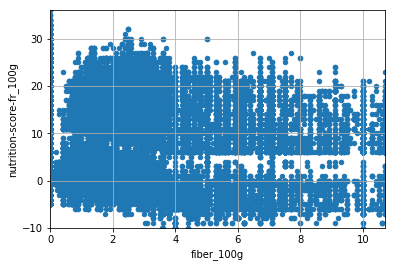

Après traitement
Fct affichage_plot : Affichage de la courbe



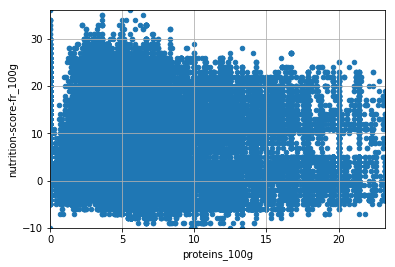

Après traitement
Fct affichage_plot : Affichage de la courbe



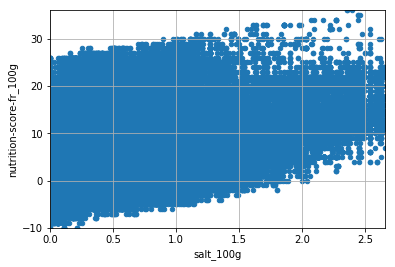

Après traitement
Fct affichage_plot : Affichage de la courbe



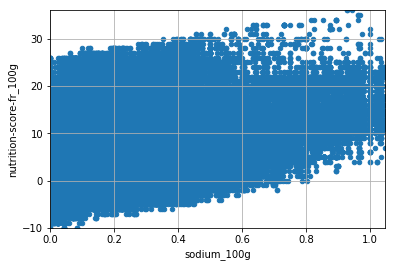

Après traitement
Fct affichage_plot : Affichage de la courbe



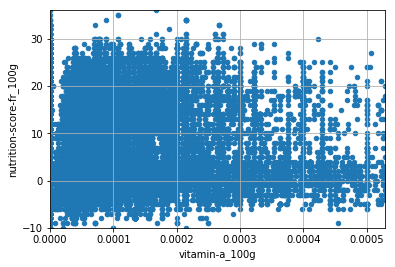

Après traitement
Fct affichage_plot : Affichage de la courbe



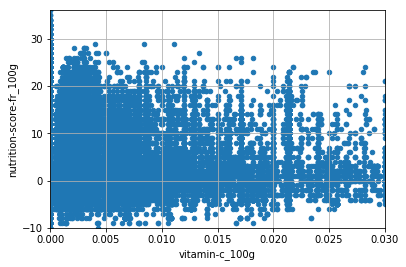

Après traitement
Fct affichage_plot : Affichage de la courbe



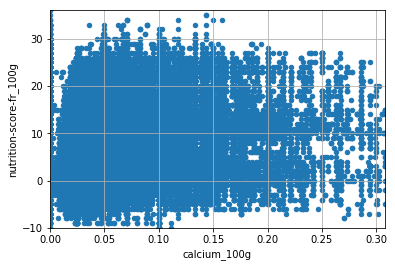

Après traitement
Fct affichage_plot : Affichage de la courbe



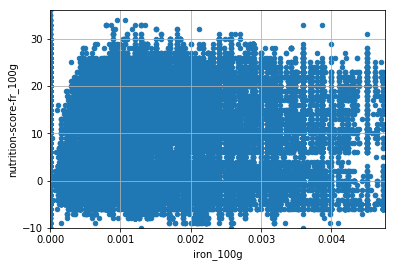



La base de données est nettoyée.




In [16]:
# Affichage des nuages de points après traitement
for i in data.columns.values[0:position_ordonne]:
    # Log
    print("Après traitement")
    affichage_plot(data, i)

print("\n\nLa base de données est nettoyée.\n\n")

In [17]:
# Appel de le fonction qui va montrer les données manquantes
fct_missing_data(data)

                column_name  missing_count  fill_fact
0               energy_100g              0      100.0
1                  fat_100g              0      100.0
2        saturated-fat_100g              0      100.0
3            trans-fat_100g              0      100.0
4          cholesterol_100g              0      100.0
5        carbohydrates_100g              0      100.0
6               sugars_100g              0      100.0
7                fiber_100g              0      100.0
8             proteins_100g              0      100.0
9                 salt_100g              0      100.0
10              sodium_100g              0      100.0
11           vitamin-a_100g              0      100.0
12           vitamin-c_100g              0      100.0
13             calcium_100g              0      100.0
14                iron_100g              0      100.0
15  nutrition-score-fr_100g              0      100.0
% fill_fact :  100.0


La base de données est propre et prête à être exportée pour être réutilisée dans un autre contexte.

In [18]:
# export csv
data.to_csv('C:\\Users\\Toni\\Desktop\\pas_synchro\\bdd_clean.csv')